# IMPORTING LIBRARIES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# CSV FILE SELECTION

In [23]:
def select_file():
    root = Tk()
    root.withdraw()  # Hide the main Tkinter window
    file_path = askopenfilename(title="Select CSV File", filetypes=[("CSV Files", "*.csv")])
    print(file_path)
    return file_path

# Prompt user to select a file
file_path = select_file()
if not file_path:
    print("No file selected. Exiting...")
    exit()




C:/Users/HP/OneDrive/Documenti/JTBD/jtbd_dataset_whit_resistance.csv


# DATA LOADING AND PREPROCESSING

In [24]:
# Load the dataset
data = pd.read_csv(file_path)


# Drop the Story_ID column (non-numeric data)
X = data.drop(columns=["Story_ID"])
data.head()

,Story_ID,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,Story_1,1,0,0,0,1,0,0,1,1,...,0,1,1,1,1,0,1,1,1,0
1,Story_2,1,0,0,0,1,0,1,0,1,...,0,1,1,1,1,1,0,1,1,0
2,Story_3,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,0
3,Story_4,1,0,1,1,0,0,1,1,1,...,0,0,1,1,0,0,0,1,1,1
4,Story_5,0,1,1,0,0,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0


In [25]:
data.describe()

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
count,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,...,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,0.600000,0.550000,0.600000,0.450000,0.65000,0.600000,0.500000,0.400000,0.35000,0.550000,...,0.35000,0.450000,0.500000,0.500000,0.35000,0.250000,0.400000,0.800000,0.65000,0.500000
std,0.502625,0.510418,0.502625,0.510418,0.48936,0.502625,0.512989,0.502625,0.48936,0.510418,...,0.48936,0.510418,0.512989,0.512989,0.48936,0.444262,0.502625,0.410391,0.48936,0.512989
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.500000,0.000000,0.00000,1.000000,...,0.00000,0.000000,0.500000,0.500000,0.00000,0.000000,0.000000,1.000000,1.00000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,0.250000,1.000000,1.000000,1.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Story_ID   20 non-null     object
 1   Push_1     20 non-null     int64 
 2   Push_2     20 non-null     int64 
 3   Push_3     20 non-null     int64 
 4   Push_4     20 non-null     int64 
 5   Push_5     20 non-null     int64 
 6   Push_6     20 non-null     int64 
 7   Push_7     20 non-null     int64 
 8   Push_8     20 non-null     int64 
 9   Push_9     20 non-null     int64 
 10  Push_10    20 non-null     int64 
 11  Push_11    20 non-null     int64 
 12  Pull_1     20 non-null     int64 
 13  Pull_2     20 non-null     int64 
 14  Pull_3     20 non-null     int64 
 15  Pull_4     20 non-null     int64 
 16  Pull_5     20 non-null     int64 
 17  Pull_6     20 non-null     int64 
 18  Pull_7     20 non-null     int64 
 19  Pull_8     20 non-null     int64 
 20  Anxiety_1  20 non-null     int64 


In [27]:
X

,Push_1,Push_2,Push_3,Push_4,Push_5,Push_6,Push_7,Push_8,Push_9,Push_10,...,Anxiety_6,Anxiety_7,Anxiety_8,Anxiety_9,Inertia_1,Inertia_2,Inertia_3,Inertia_4,Inertia_5,Inertia_6
0,1,0,0,0,1,0,0,1,1,1,...,0,1,1,1,1,0,1,1,1,0
1,1,0,0,0,1,0,1,0,1,1,...,0,1,1,1,1,1,0,1,1,0
2,0,0,1,0,0,0,0,0,1,1,...,1,0,0,0,0,0,1,1,1,0
3,1,0,1,1,0,0,1,1,1,1,...,0,0,1,1,0,0,0,1,1,1
4,0,1,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
5,1,1,1,0,1,1,0,1,1,1,...,0,1,1,0,0,0,0,1,0,1
6,0,1,1,1,1,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,1
8,0,1,0,0,0,1,1,0,1,1,...,0,1,0,0,1,0,0,1,1,1
9,1,0,1,1,0,1,1,1,0,0,...,1,0,0,1,0,0,1,1,1,0


# SCATTER PLOT FOR INITILA DATA VISUALIZATION

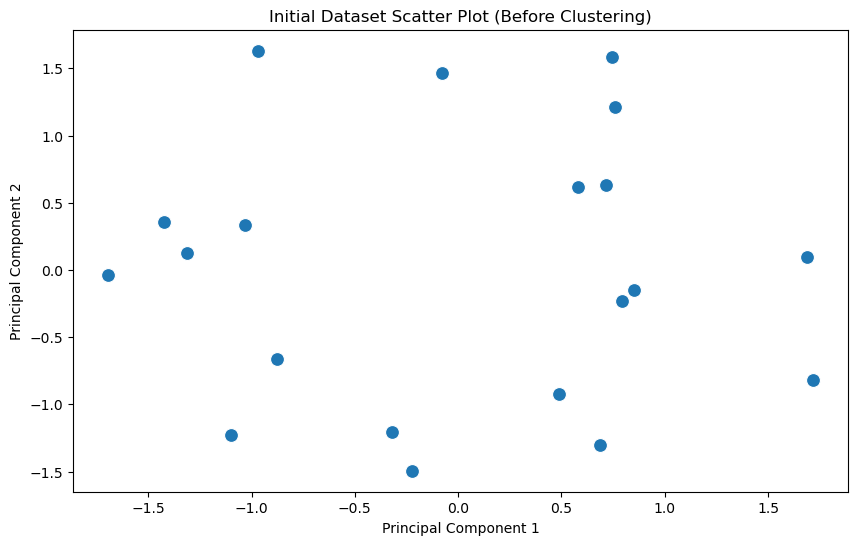

In [28]:
# Scatter plot of the dataset (initial visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=100)
plt.title("Initial Dataset Scatter Plot (Before Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# WARDS METHOD

In [29]:
def ward(x):
    # Perform hierarchical clustering using Ward's method
    linkage_matrix = linkage(x, method="ward")

    # Define the number of clusters and extract cluster labels
    num_clusters = 4  # Adjust as needed
    labels = fcluster(linkage_matrix, num_clusters, criterion="maxclust")

    # Add cluster labels to the dataset
    data["Cluster"] = labels
    return labels, linkage_matrix

# SCATTER PLOT AFTER CLUSTERING

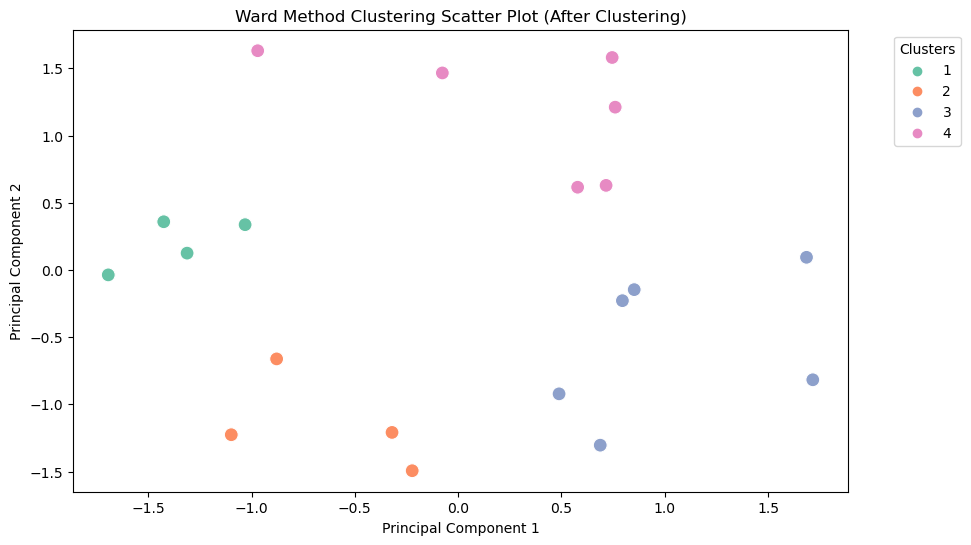

In [30]:
labels_pca, linkage_matrix_pca = ward(X_pca)
# Scatter plot after clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_pca, palette="Set2", s=100)
plt.title("Ward Method Clustering Scatter Plot (After Clustering)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# DENDOGRAM PLOTTING

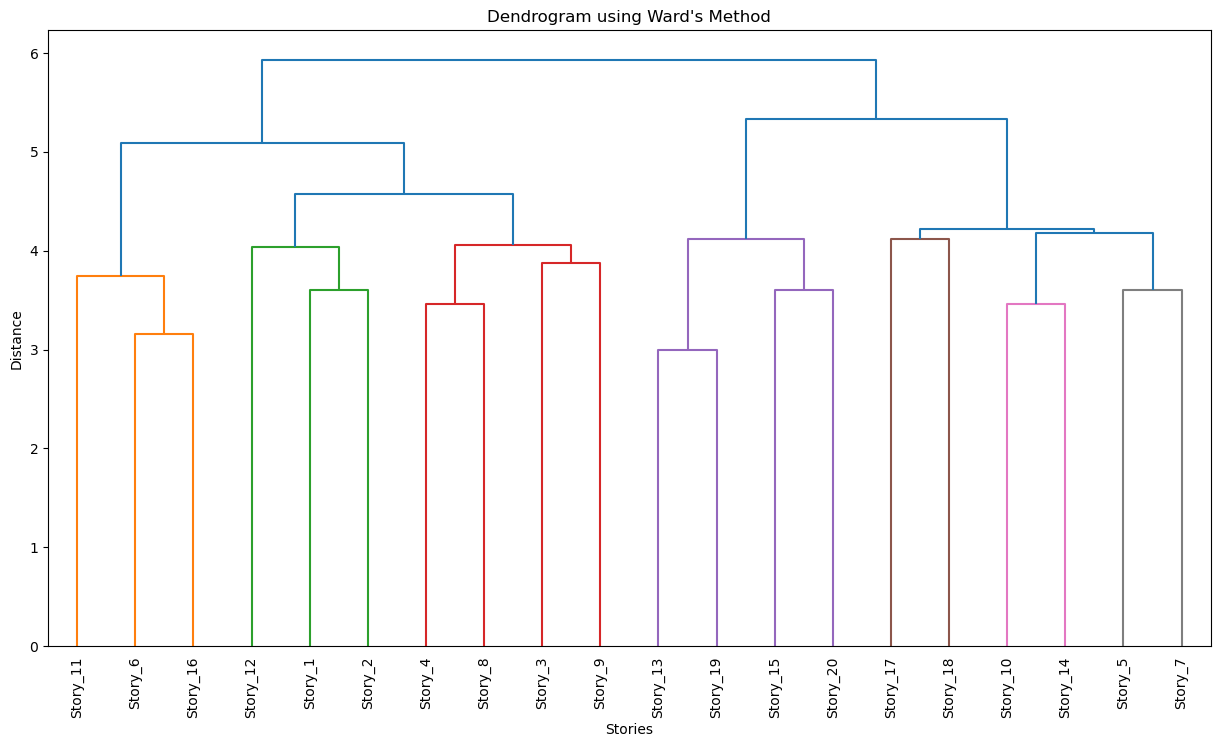

In [31]:
labels, linkage_matrix = ward(X)
# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=data["Story_ID"].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram using Ward's Method")
plt.xlabel("Stories")
plt.ylabel("Distance")
plt.show()



# EVALUATION

In [11]:
# Evaluate clustering performance
if len(set(labels)) > 1:  # Ensure more than one cluster exists
    silhouette_avg = silhouette_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)    
    davies_bouldin = davies_bouldin_score(X, labels)
else:
    silhouette_avg, calinski_harabasz, davies_bouldin = None, None, None

print("Evaluation Metrics On Dataset without Resistance Forces:")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Evaluation Metrics On Dataset without Resistance Forces:
Silhouette Score: 0.08021916606689358
Calinski-Harabasz Score: 2.040517799352751
Davies-Bouldin Score: 1.6922947024320432
